<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/winequality_red(Proyecto1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

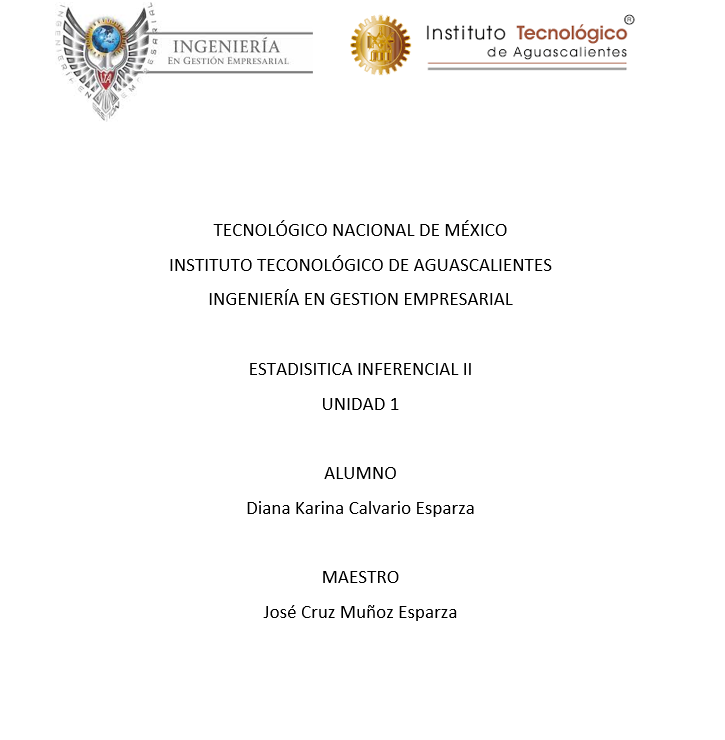

##Introducción

El presente proyecto tiene como objetivo analizar la relación entre diversas características químicas del vino tinto y su calidad, utilizando un conjunto de datos. La calidad del vino, aunque subjetiva en cierta medida, puede estar fuertemente influenciada por variables químicas específicas, siendo el nivel de alcohol una de las más relevantes. A partir de herramientas estadísticas como el análisis de varianza (ANOVA), la regresión lineal, así como pruebas de normalidad y homogeneidad de varianza, se pretende evaluar si el contenido de alcohol varía significativamente entre diferentes niveles de calidad y determinar qué tan fuerte es su asociación con esta. Este análisis permitirá explorar si el alcohol puede considerarse un buen predictor de la calidad percibida del vino.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/winequality-red.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##Metodología

Se utilizó el archivo winequality-red.csv que contiene 1599 observaciones y 12 variables químicas y sensoriales.
Se exploró la distribución de las variables de alcohol y calidad mediante histogramas y medidas.

ANOVA: Se aplicó ANOVA de un factor para verificar si existen diferencias significativas en el nivel de alcohol entre los niveles de calidad del vino. Se obtuvo un valor p < 0.05, lo cual indica diferencias significativas.

Pruebas de supuestos:

Shapiro-Wilk: Indicó que los residuos no siguen una distribución normal (valor-p ≈ 0.000).

Levene: Rechazó la homogeneidad de varianzas (valor-p ≈ 1.45e-23).

Breusch-Pagan: Indicó presencia de heterocedasticidad (valor-p ≈ 0.0027).

Comparaciones post-hoc: Se aplicó la prueba de Tukey para identificar qué pares de calidades tienen diferencias significativas en sus niveles de alcohol.

Regresión lineal: Se evaluó la relación entre calidad y alcohol. Se obtuvo un coeficiente de correlación de 0.4762 y un R² de 0.2267, indicando una relación moderada. La pendiente de la recta de regresión tuvo un intervalo de confianza al 95% entre 0.5714 y 0.6853

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df=df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
df.columns=['fixed_acidity', 'volatile_acidity','citric_acid', 'residual_sugar',
       'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
       'pH','sulphates','alcohol','quality']
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('alcohol~ C(quality)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,483.937982,96.787596,115.854797,1.209895e-104
Residual,1593.0,1330.826555,0.835422,NaN,NaN


In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

valor-p (Shapiro) = 1.1993323487892608e-18


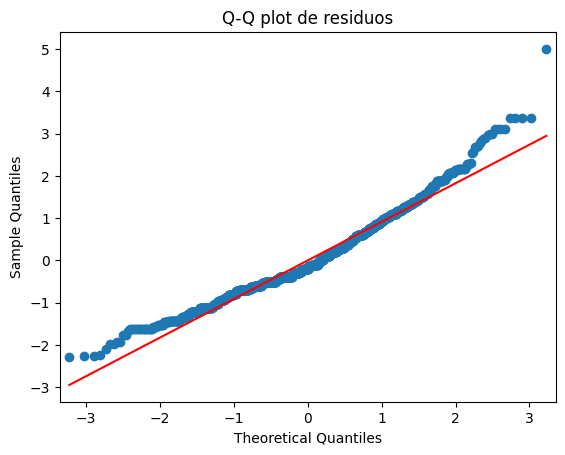

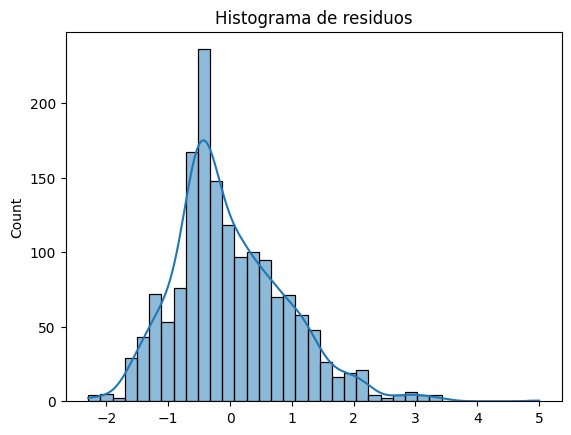

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import shapiro
valor_p_sh = shapiro(modelo_lineal.resid)[1]
print(f"valor-p (Shapiro) = {valor_p_sh}")

valor-p (Shapiro) = 1.1993323487892608e-18


In [ ]:
from scipy.stats import levene
grupo1 = df[df['quality'] == 5]['alcohol']
grupo2 = df[df['quality'] == 6]['alcohol']
grupo3 = df[df['quality'] == 7]['alcohol']
grupo4= df[df['quality'] == 4]['alcohol']
grupo5 = df[df['quality'] == 8]['alcohol']
grupo6 = df[df['quality'] == 3]['alcohol']

stat, p = levene(grupo1,grupo2,grupo3,grupo4,grupo5,grupo6)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 1.454260048298386e-23


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.3101 0.9231  -0.589 1.2092  False
     3      5  -0.0553    1.0  -0.886 0.7754  False
     3      6   0.6745 0.1883 -0.1566 1.5056  False
     3      7   1.5109    0.0  0.6658 2.3561   True
     3      8   2.1394    0.0  1.1109  3.168   True
     4      5  -0.3654 0.0574 -0.7373 0.0065  False
     4      6   0.3644 0.0597 -0.0084 0.7372  False
     4      7   1.2008    0.0  0.7977 1.6039   True
     4      8   1.8294    0.0  1.1179 2.5408   True
     5      6   0.7298    0.0  0.5861 0.8735   True
     5      7   1.5662    0.0  1.3561 1.7764   True
     5      8   2.1947    0.0   1.572 2.8175   True
     6      7   0.8364    0.0  0.6247 1.0481   True
     6      8   1.4649    0.0  0.8416 2.0882   True
     7      8   0.6285 0.0589 -0.0133 1.2704  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

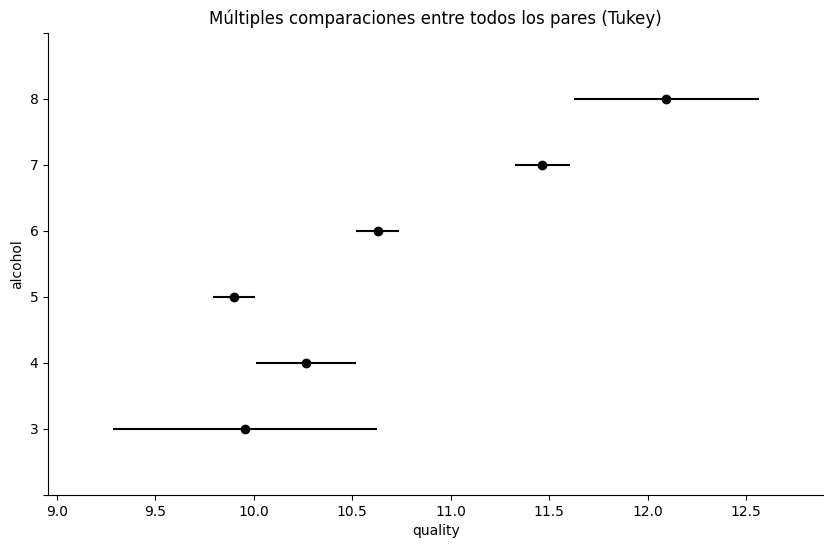

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['alcohol'], groups=df['quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="alcohol", xlabel="quality")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
eta_squared = tabla_anova['sum_sq']['C(quality)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.267


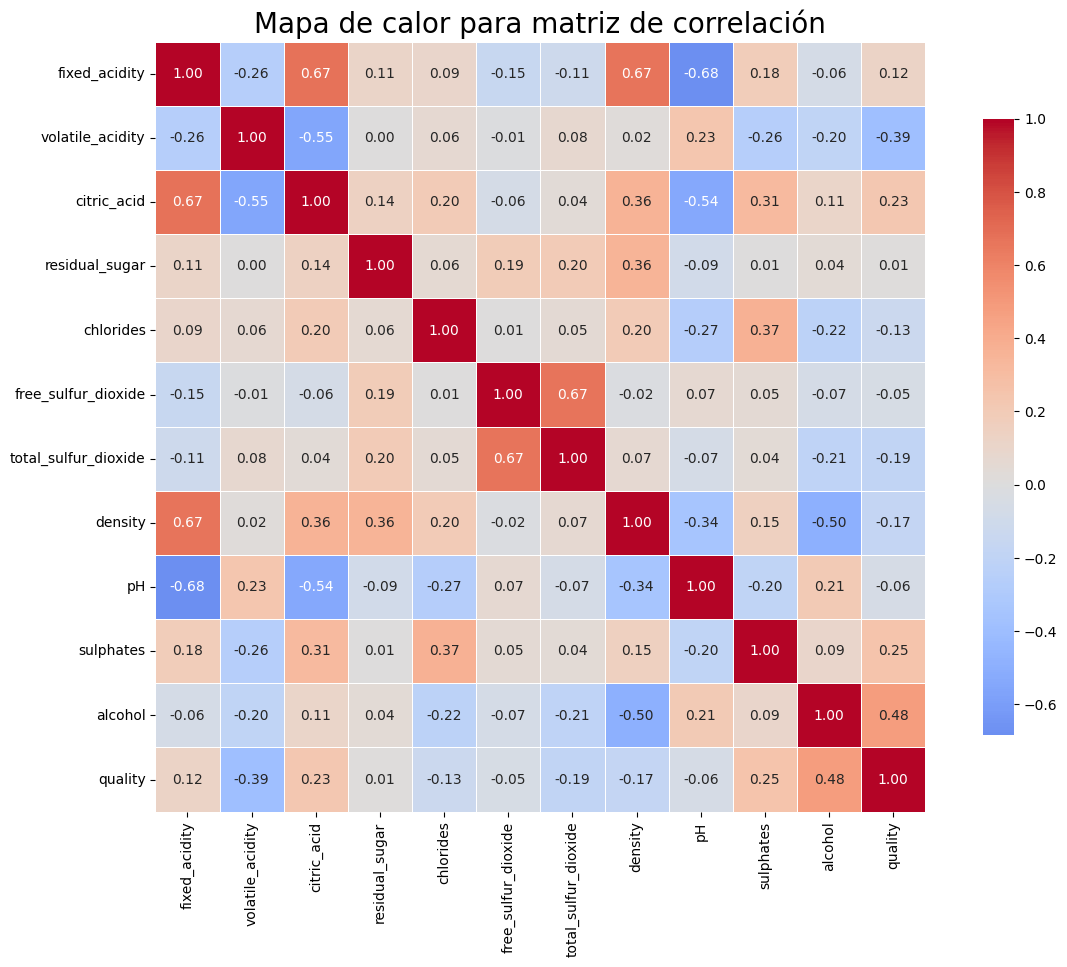

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(15,10),dpi=100)
sns.heatmap(matriz_de_correlacion,annot=True,fmt="0.2f",cmap="coolwarm",square=True,linewidths=0.5,cbar_kws={"shrink":0.8},center=0)
plt.title("Mapa de calor para matriz de correlación",fontsize=20)
plt.yticks(rotation=0)
sns.heatmap
annot=True
fmt="0.2f"
cmap="coolwarm"
center=0
cbar_kws={"shrink":1.0}

<Axes: >

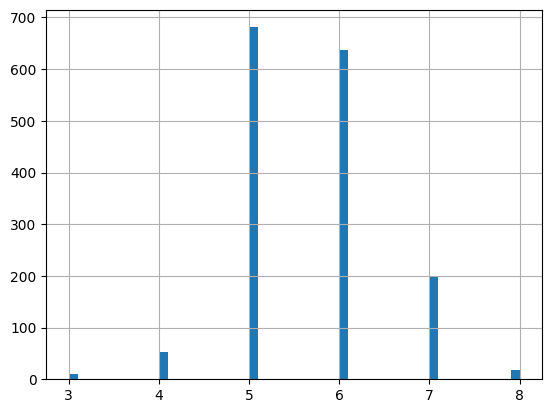

In [ ]:
df["quality"].hist(bins=50)

<Axes: >

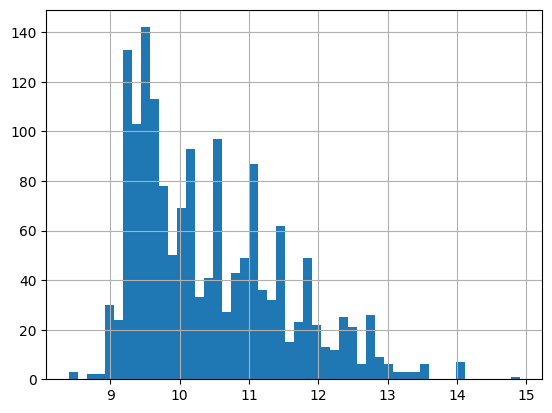

In [ ]:
df["alcohol"].hist(bins=50)

In [ ]:
df = df[df["quality"]!=0]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

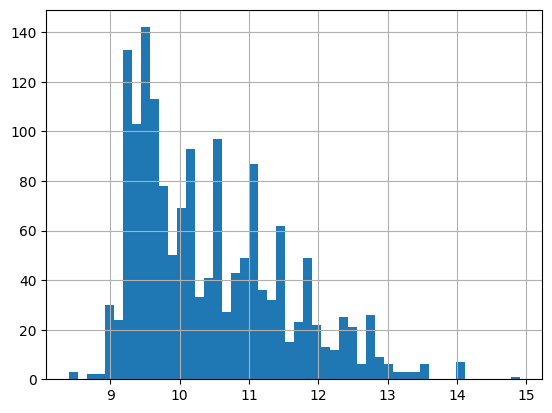

In [ ]:
df["alcohol"].hist(bins=50)

Coeficiente de correlación:  0.4762

Coeficiente de determinación:  0.2267

Intervalo de confianza para b1 de  95%
 0.5714 < b1 <  0.6853

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0027



,df,sum_sq,mean_sq,F,PR(>F)
quality,1.0,411.469491,411.469491,468.267011,2.831477e-91
Residual,1597.0,1403.295047,0.878707,NaN,NaN


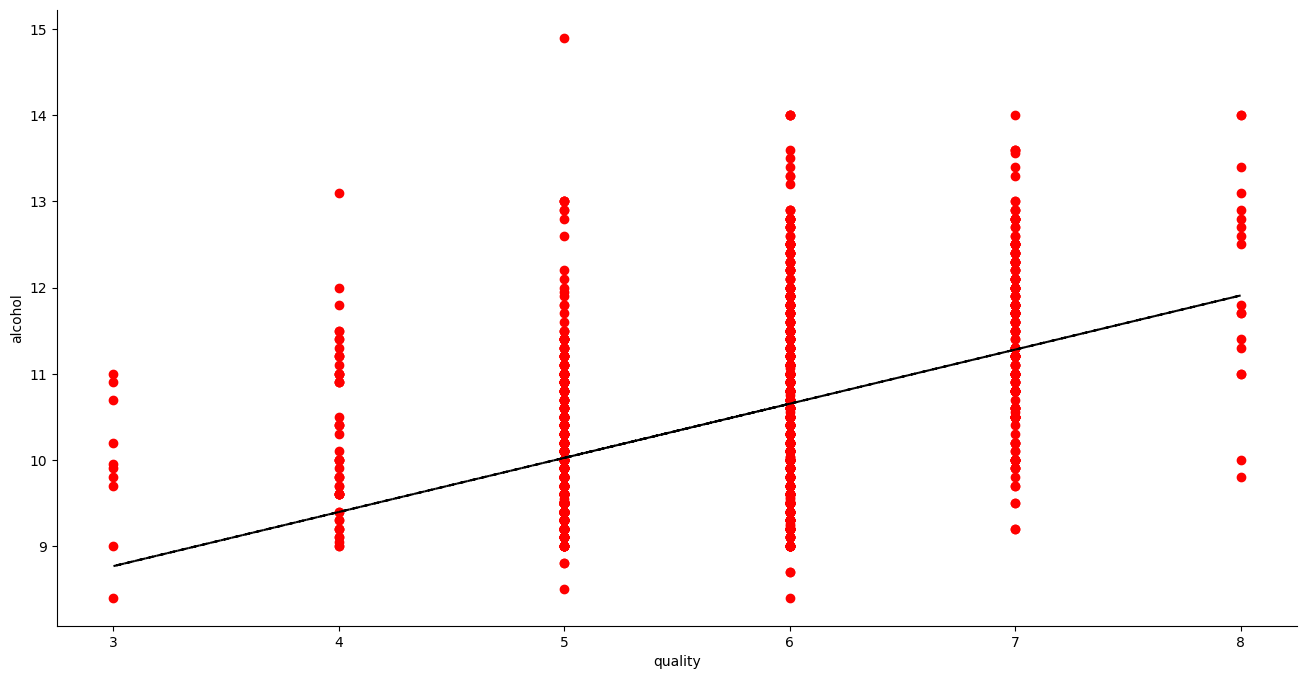

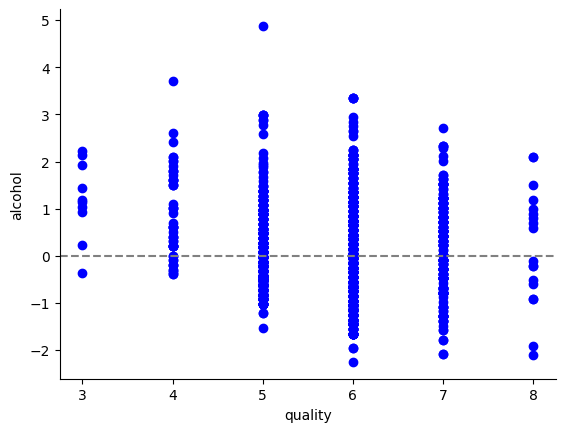

In [ ]:
x = df["quality"]
y = df["alcohol"]

# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8), dpi = 100)
plt.scatter(x, y, label = "Promedio final", color = 'red')
plt.xlabel('quality') # nombrar eje x
plt.ylabel('alcohol') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('alcohol ~ quality', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


In [1]:
##El análisis ANOVA mostró diferencias significativas en el contenido de alcohol según la calidad del vino (p < 0.0001).los supuestos del modelo no se cumplen estrictamente:
##Los residuos no siguen una distribución normal.
##No se cumple la homogeneidad de varianzas.
##Existe heterocedasticidad según la prueba de Breusch-Pagan.
##la prueba de Tukey reveló diferencias significativas entre múltiples pares de grupos, especialmente entre calidades extremas (por ejemplo, entre vinos de calidad 3 y 8).
##La regresión lineal evidenció una asociación positiva: a mayor calidad, mayor contenido de alcohol.
##El valor de n² (0.2267) indica que aproximadamente el 23% de la variación en el nivel de alcohol se explica por la calidad del vino.

Existe una relación significativa entre el nivel de alcohol y la calidad del vino tinto.
El contenido de alcohol tiende a aumentar conforme mejora la calidad percibida del vino.
Aunque los modelos aplicados indican una asociación significativa, los supuestos del análisis estadístico no se cumplen completamente.
Este estudio demuestra cómo el análisis estadístico puede ser una herramienta útil para comprender características importantes en productos de consumo como el vino.